In [481]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [482]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [483]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [484]:
from PIML.box.boxWR import BoxWR

In [485]:
bb = BoxWR()

#220 R=1000.00
(2204,) (220,)
sky_H (2204,)
snr2nl-SN [118.36511806290223, 126.43542909949568, 126.19278367193178, 109.7742722291957, 99.00123202697678, 82.00257252430589, 74.44037606583458, 46.286434461921196, 23.827726724918577, 10.009192192906355, 6.376586782204838]
Top10 eigs [105.32   7.07   5.2    1.44   1.21   0.76   0.57   0.49   0.35   0.28]
Building RBF with gaussan kernel on data shape (2880,)
Building RBF with gaussan kernel on data shape (2880, 10)


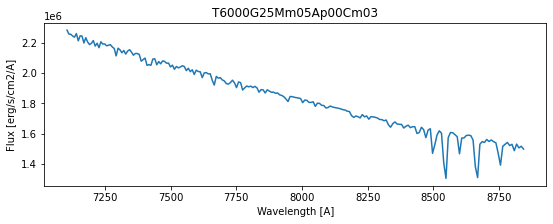

In [486]:
W="RedM"; R="R"; Res=5000;step=10;
bb.init(W,R, Res,step, onPCA=1)

In [166]:
np.random.seed(42)
obH, ovH = bb.Obs.add_obs_to_flux(bb.fluxH0, 100, step=0)

In [174]:
bb.Obs.get_snr(obH) / 1.414

10.000682356945424

In [477]:
bb.estimate_snr(100)

9.471621972684638

In [169]:
np.random.seed(42)
ob, ov = bb.Obs.add_obs_to_flux(bb.flux0, 100, step=bb.step)

In [172]:
bb.Obs.get_snr(ob)

53.17164756918003

In [171]:
(37  / 14 )**2

6.98469387755102

(8500.0, 8750.0)

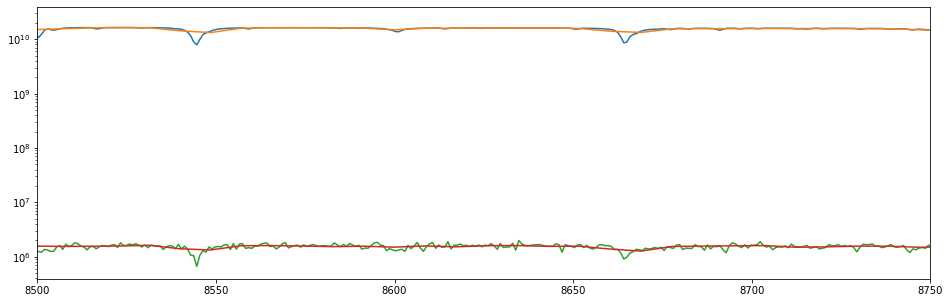

In [179]:
plt.figure(figsize=(16,5))
plt.plot(bb.wave_H,ovH)
plt.plot(bb.wave, ov*10)
# plt.plot(bb.wave, obsvar*10)
plt.plot(bb.wave_H, obH)

plt.plot(bb.wave, ob)
plt.yscale("log")
plt.xlim(8500, 8750)

In [182]:
bb.PhyMid

array([-5.0e-01,  6.0e+03,  2.5e+00, -2.5e-01,  0.0e+00])

In [353]:
name = bb.Obs.get_pmt_name(*bb.PhyMid)

In [480]:
diff_1M_100, bias_1M_100 = bb.eval_pca_bias(bb.PhyMid, 1000000, noise_level=100)
diff_10k_100, bias_10k_100 = bb.eval_pca_bias(bb.PhyMid, 10000, noise_level=100)
diff_10k_30, bias_10k_30 = bb.eval_pca_bias(bb.PhyMid, 10000, noise_level=30)

noise_level 100


ValueError: too many values to unpack (expected 2)

as we go to lower coefficients, we see 10% to 20% error. Higher coeffients which contain information of [M/H] and logg doesn't contribute. Most of the information from Teff, logg are encoded in the first 3 coeffs. We are doing pretty well with the first few coeffients. there's no point to go to further eigvs, When taking log might causing systematic bias. non-bias estimator. It is We generate bias analysis for all boxes to see if the bias depends on the shape of spectra.

In [ ]:
diffs = [diff_10k_100,diff_1M_100,diff_10k_30]

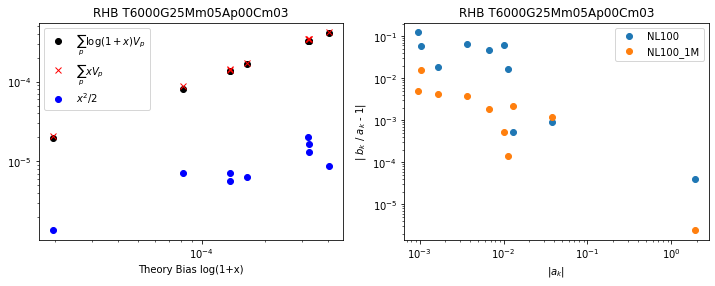

In [478]:
bb.plot_bias_evals(diffs, bias_10k_100, diff_labels=["NL100", "NL100_1M"],)

[array([-7.35236007e-05,  6.94171098e-06,  3.38392589e-05,  6.29237538e-04,
         3.07728070e-05, -2.43746404e-04,  1.87037769e-04, -6.08917535e-05,
        -3.21267874e-04, -1.17253464e-04]),
 array([ 4.57668443e-06,  2.79981585e-05, -4.41128580e-05,  5.38528627e-06,
        -6.84229671e-06, -1.38549246e-05, -1.57329989e-06,  1.62355397e-05,
        -1.27999169e-05, -4.83412328e-06])]

In [ ]:
bb.plot_exp_bias(diffs)

0.00032180974845671365


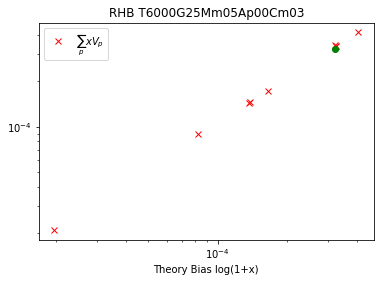

In [472]:
b0 = bb.plot_theory_bias(bias_10k_100, NL=100, log=1)

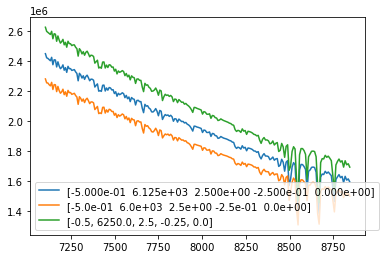

In [487]:
pmt2 = [-5.0e-01,  6.25e+03,  2.5e+00, -2.5e-01,  0.0e+00]
bb.test_rbf(bb.PhyMid, pmt2)

noise_level 50


TypeError: cannot unpack non-iterable NoneType object

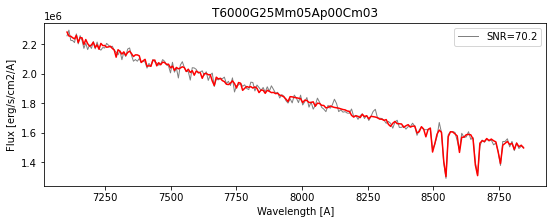

In [488]:
snr =50
obsflux, obsvar = bb.make_obs_from_pmt(bb.PhyMid, snr, plot=1)

Fitting with Template T6000G25Mm05Ap00Cm03
estimate 5988.191986083984


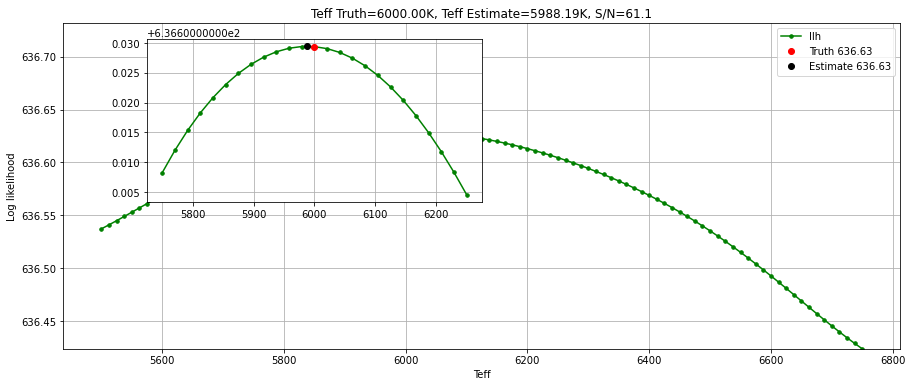

In [489]:
temp_pmt = bb.PhyMid
_=bb.LLH.eval_pmt_on_axis(temp_pmt, temp_pmt[1], obsflux, obsvar, axis="T")

Fitting with Template T6000G25Mm05Ap00Cm03
estimate -0.5523437500000001


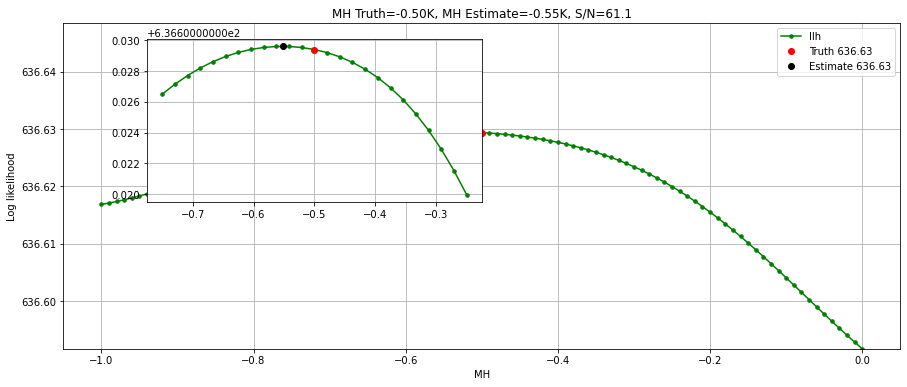

In [490]:
_=bb.LLH.eval_pmt_on_axis(temp_pmt, temp_pmt[0], obsflux, obsvar, axis="M")

Fitting with Template T6000G25Mm05Ap00Cm03
estimate 2.55023193359375


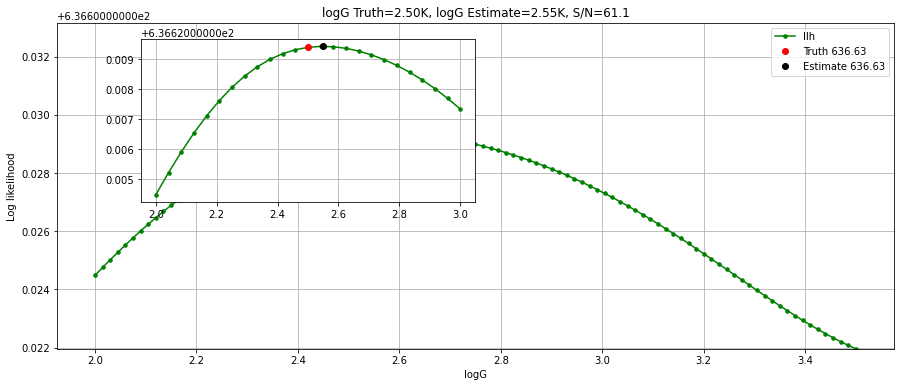

In [491]:
_=bb.LLH.eval_pmt_on_axis(temp_pmt, temp_pmt[2], obsflux, obsvar, axis="G")

In [495]:
snr

50

In [498]:
snr

10

  0%|          | 0/10 [00:00<?, ?it/s]

noise_level 100


 10%|█         | 1/10 [00:03<00:30,  3.40s/it]

noise_level 100


 20%|██        | 2/10 [00:06<00:27,  3.41s/it]

noise_level 100


 30%|███       | 3/10 [00:10<00:24,  3.47s/it]

noise_level 100


 40%|████      | 4/10 [00:13<00:20,  3.45s/it]

noise_level 100


 50%|█████     | 5/10 [00:17<00:16,  3.38s/it]

noise_level 100


 60%|██████    | 6/10 [00:20<00:13,  3.31s/it]

noise_level 100


 70%|███████   | 7/10 [00:23<00:10,  3.44s/it]

noise_level 100


 80%|████████  | 8/10 [00:27<00:06,  3.40s/it]

noise_level 100


 90%|█████████ | 9/10 [00:30<00:03,  3.38s/it]

noise_level 100


100%|██████████| 10/10 [00:33<00:00,  3.39s/it]


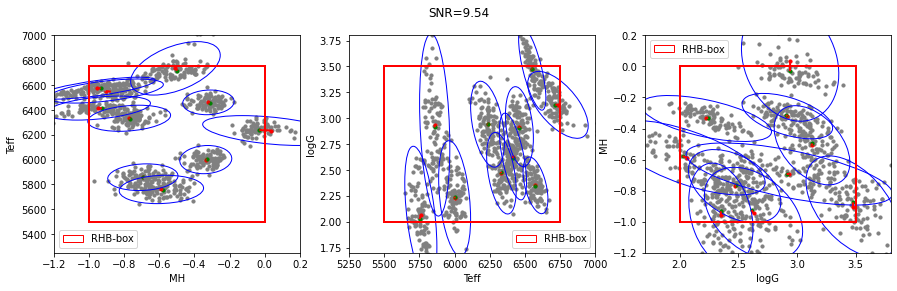

In [509]:
np.random.seed(926)
bb.eval_LLH_NL(noise_level=100, N_pmt=10, N_obs=100, n_box=0.2)

100%|██████████| 10/10 [00:34<00:00,  3.42s/it]


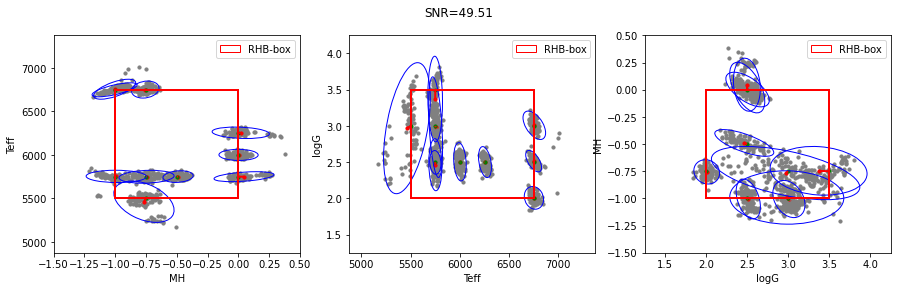

In [ ]:
snr = 50
bb.eval_LLH_snr(snr, N_pmt=10, N_obs=100)

100%|██████████| 10/10 [01:40<00:00, 10.01s/it]


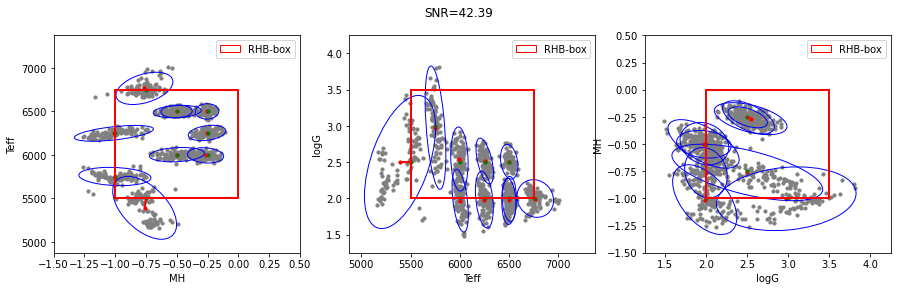

In [195]:
snr = 50
bR.eval_LLH_snr(snr, N_pmt=10, N_obs=100)

100%|██████████| 10/10 [01:46<00:00, 10.67s/it]


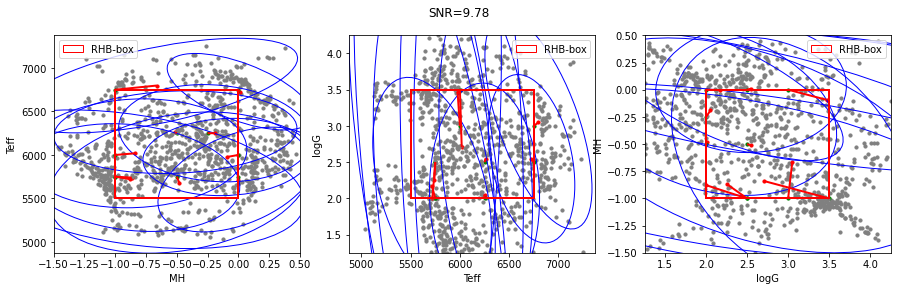

In [196]:
snr = 10
bR.eval_LLH_snr(snr, N_pmt=10, N_obs=100)

100%|██████████| 10/10 [00:56<00:00,  5.67s/it]


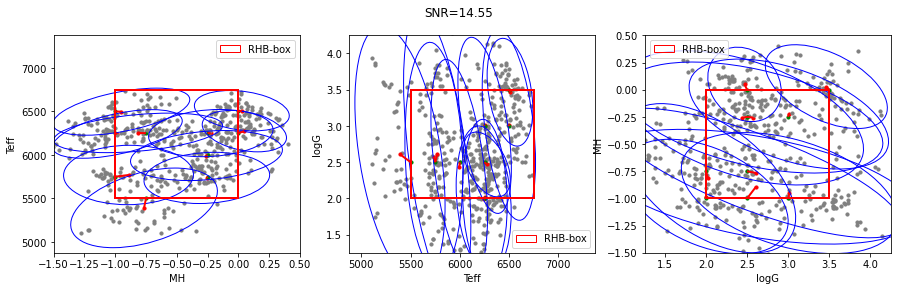

In [197]:
snr = 20
bR.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

#220 R=1000.00
(2204,) (220,)
Building RBF with gaussan kernel on data shape (7776, 220)


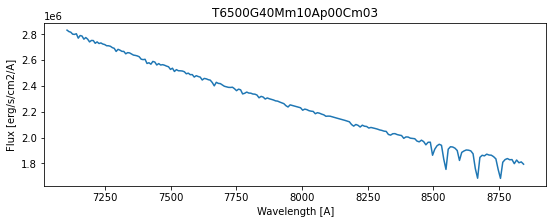

In [198]:
R="W"; 
W="RedM"; Res=5000;step=10;
bW = BoxWR()
bW.init(W,R, Res,step)

100%|██████████| 10/10 [02:27<00:00, 14.71s/it]


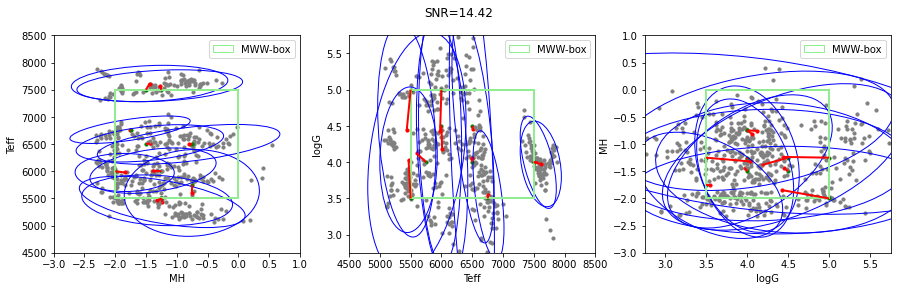

In [200]:
snr = 20
bW.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

100%|██████████| 10/10 [02:44<00:00, 16.43s/it]


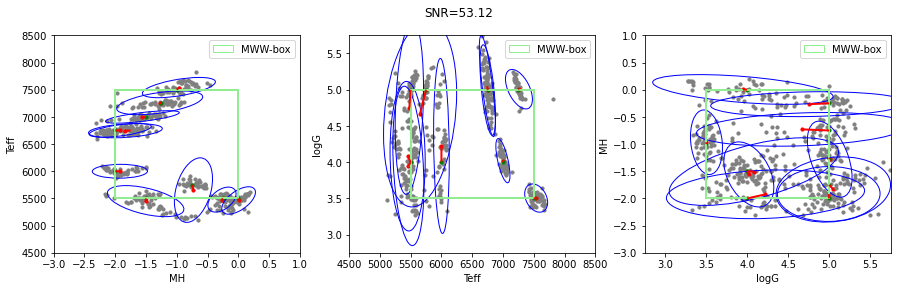

In [201]:
snr = 50
bW.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

#220 R=1000.00
(2204,) (220,)
Building RBF with gaussan kernel on data shape (5760, 220)


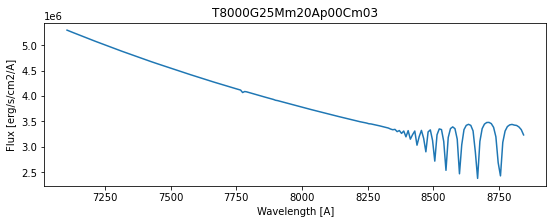

In [202]:
R="B"; 
W="RedM"; Res=5000;step=10;
bB = BoxWR()
bB.init(W,R, Res,step)

100%|██████████| 10/10 [01:56<00:00, 11.60s/it]


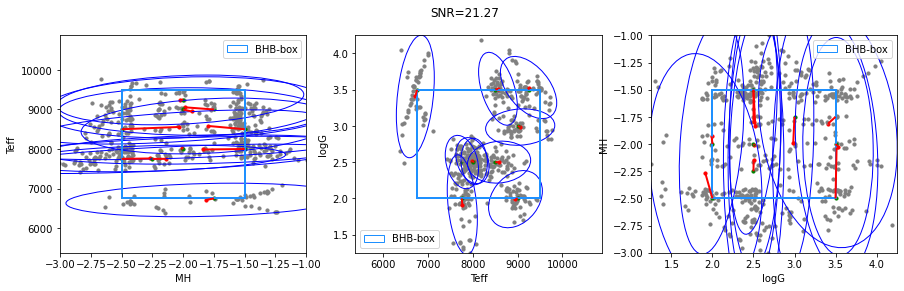

In [203]:
snr = 20
bB.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

100%|██████████| 10/10 [01:59<00:00, 11.95s/it]


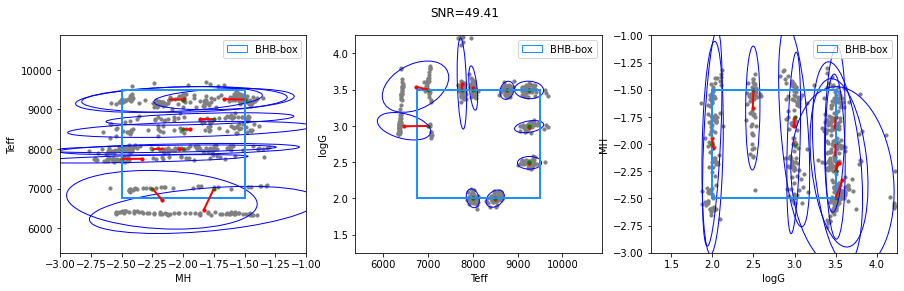

In [204]:
snr = 50
bB.eval_LLH_snr(snr, N_pmt=10, N_obs=50)